in this file:
- take results from inputed results file and graph them!

In [1]:
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Read the data from the tsv file
# data = pd.read_csv("data/FE/resultsV3.tsv", sep='\t')
data = pd.read_csv("data/FE/resultsV4.tsv", sep='\t')


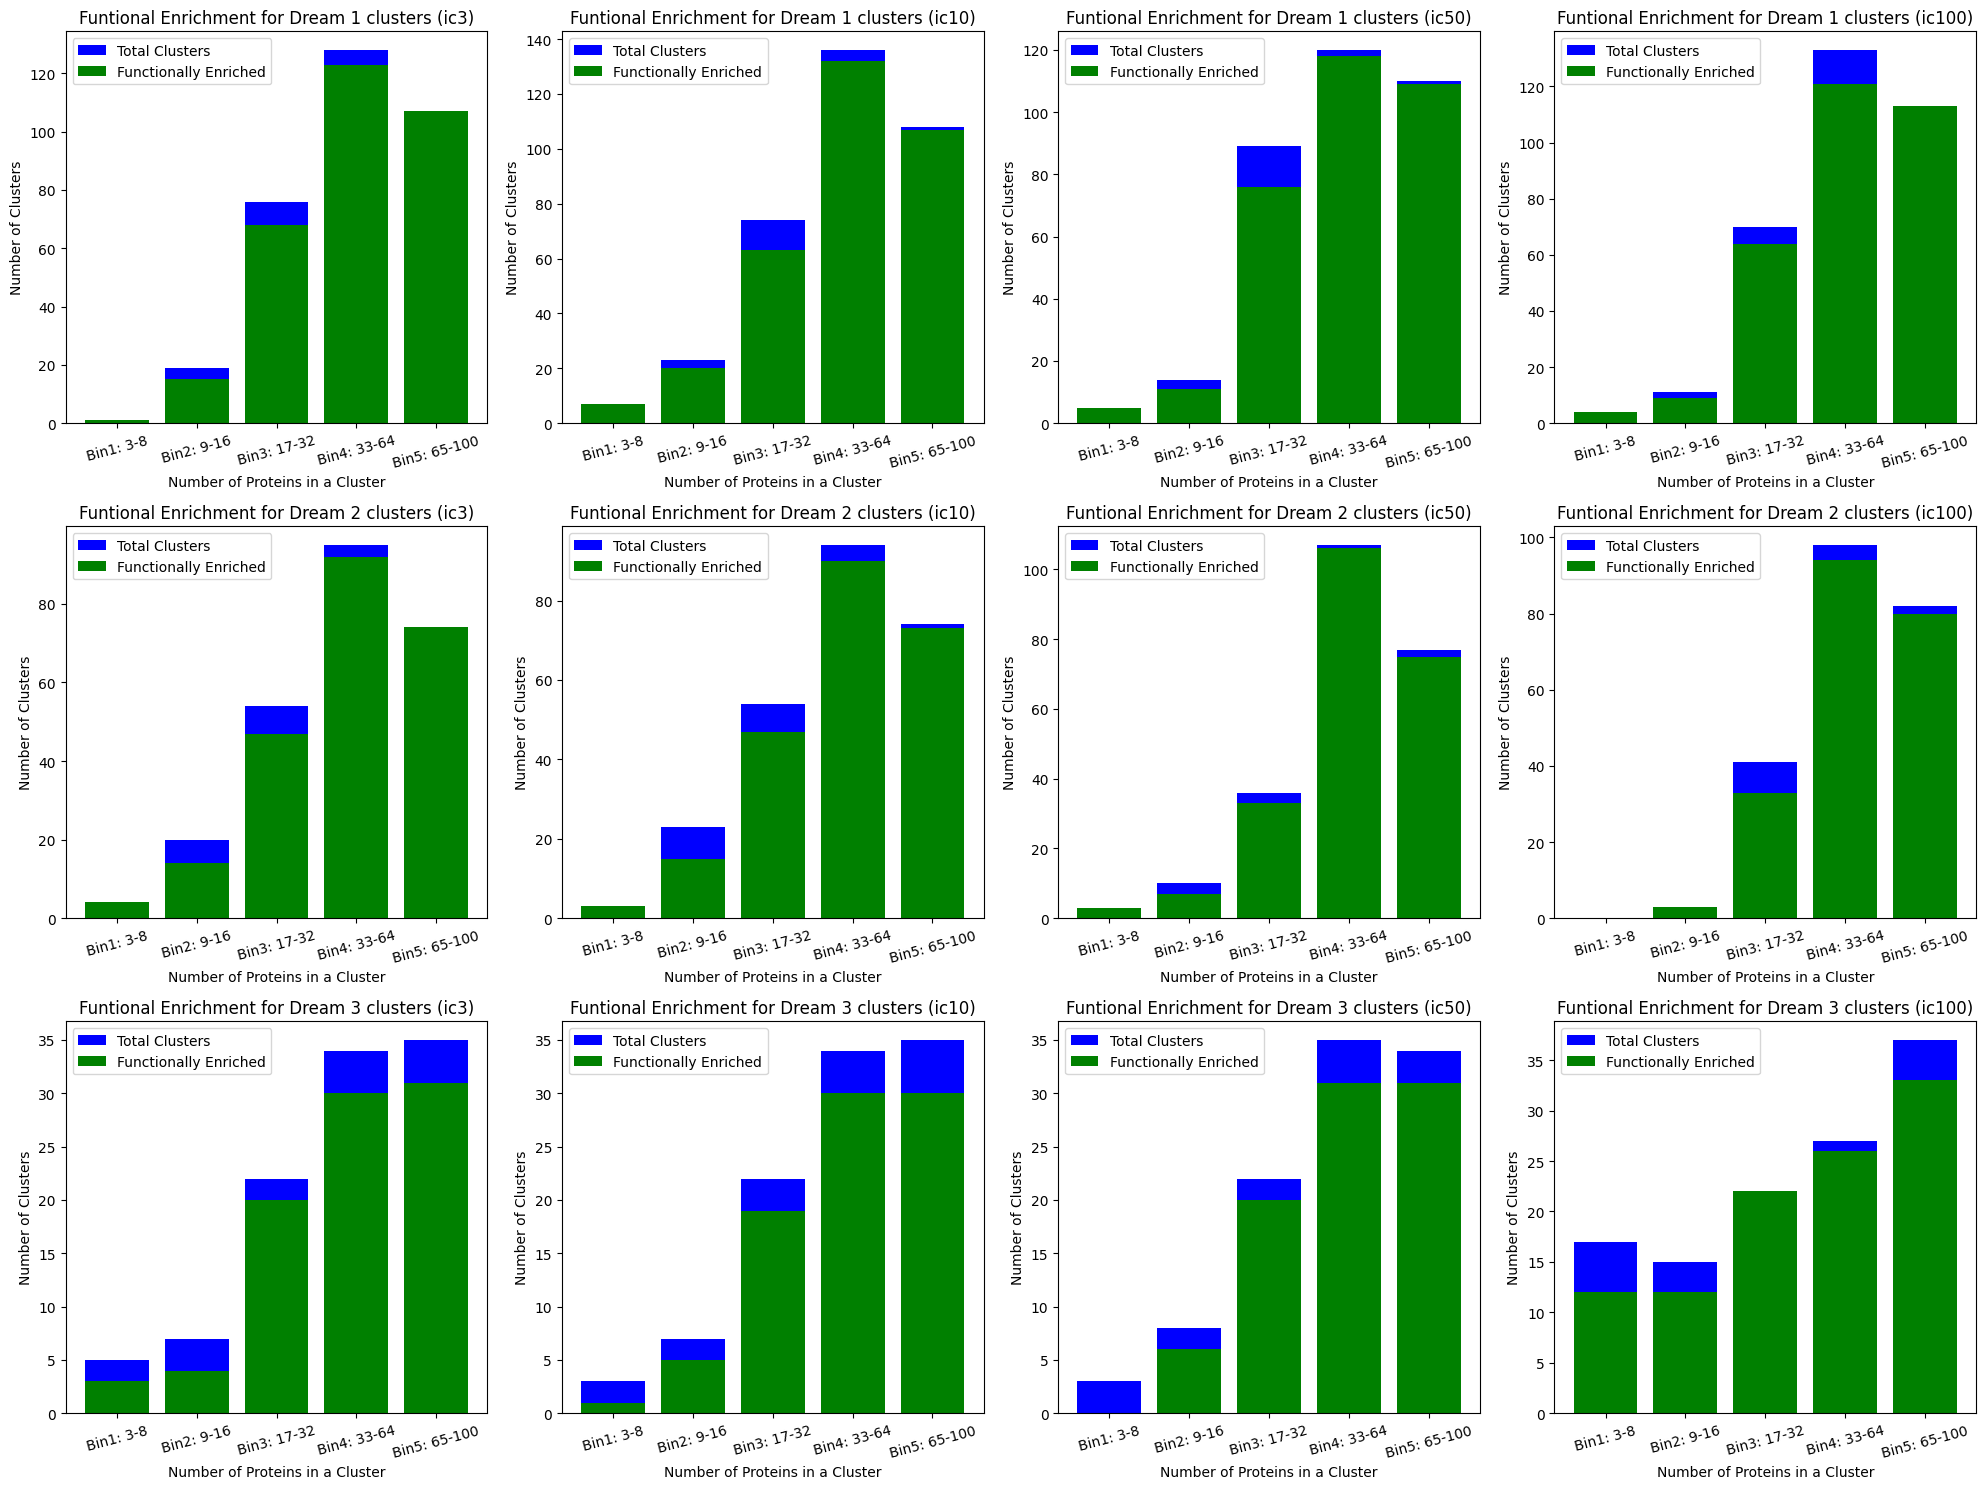

In [4]:
# Define the list of dreams and scps
dreams = ["d1", "d2", "d3"]
scps = ["ic3", "ic10","ic50", "ic100"] 


# Create a subplot for each dream
num_rows = len(dreams)
num_cols = len(scps)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))

for i, dream in enumerate(dreams):
    for j, scp in enumerate(scps):
        try:
            data_string = dream + "_" + scp     
            filtered_df = data[data['label'].str.startswith(data_string + "/bin")]

            # Extract the relevant columns
            num_clusters = filtered_df['num_clusters']
            original_fe_clusters = filtered_df['original']

            # Plot the histogram in the corresponding subplot
            labels = ["Bin1: 3-8", "Bin2: 9-16", "Bin3: 17-32", "Bin4: 33-64", "Bin5: 65-100"]
            
            axes[i, j].set_title(f'Funtional Enrichment for Dream {dream[1:]} clusters ({scp})')
            axes[i, j].set_xlabel('Number of Proteins in a Cluster')
            axes[i, j].set_ylabel(f'Number of Clusters')

            axes[i, j].bar(labels, num_clusters, label='Total Clusters', color='b')
            axes[i, j].bar(labels, original_fe_clusters, label='Functionally Enriched', color='g', alpha=1.0)
            axes[i, j].tick_params(axis='x', rotation=15)
            axes[i, j].legend()
        except:
            pass


# Adjust the layout and spacing between subplots
plt.tight_layout()
plt.show()


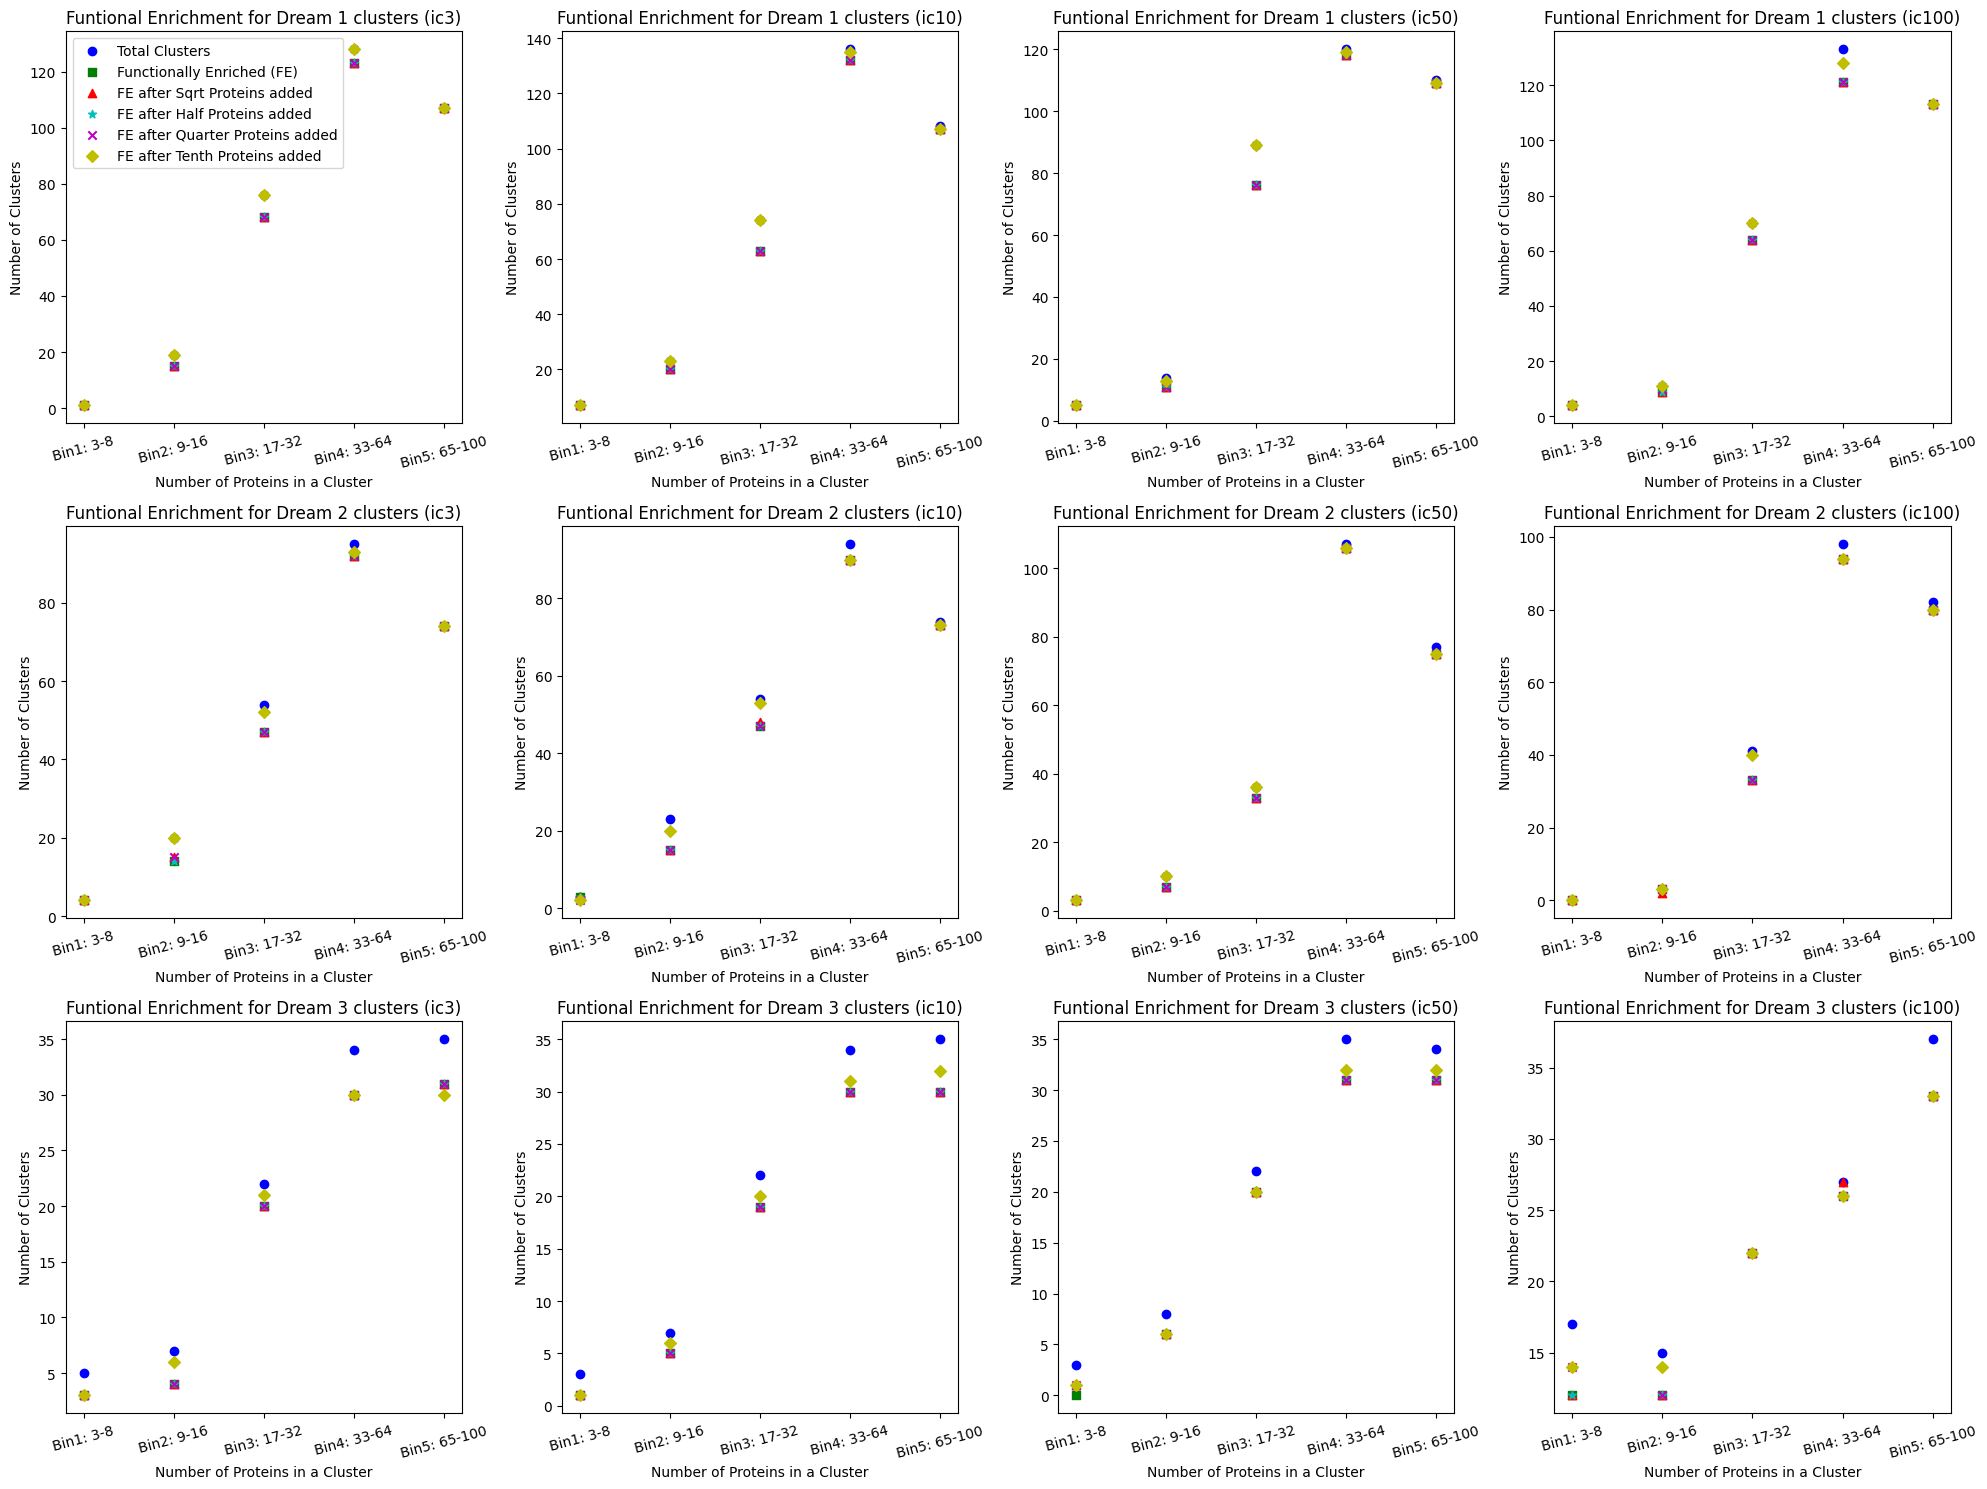

In [5]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))

for i, dream in enumerate(dreams):
    for j, scp in enumerate(scps):
        try:
            data_string = dream + "_" + scp     
            filtered_df = data[data['label'].str.startswith(data_string + "/bin")]

            # Extract the relevant columns
            num_clusters = filtered_df['num_clusters']
            original_fe_clusters = filtered_df['original']
            sqrt_fe_clusters = filtered_df['sqrt']
            half_fe_clusters = filtered_df['half']
            quarter_fe_clusters = filtered_df['quarter']
            tenth_fe_clusters = filtered_df['tenth']

            # Plot the histogram in the corresponding subplot
            labels = ["Bin1: 3-8", "Bin2: 9-16", "Bin3: 17-32", "Bin4: 33-64", "Bin5: 65-100"]
            axes[i, j].set_xlabel('Number of Proteins in a Cluster')
            axes[i, j].set_ylabel(f'Number of Clusters')
            axes[i, j].set_title(f'Funtional Enrichment for Dream {dream[1:]} clusters ({scp})')
            axes[i, j].tick_params(axis='x', rotation=15)


            axes[i, j].scatter(labels, num_clusters, label='Total Clusters', color='b', marker='o')
            axes[i, j].scatter(labels, original_fe_clusters, label='Functionally Enriched (FE)', color='g', marker='s')
            axes[i, j].scatter(labels, sqrt_fe_clusters, label='FE after Sqrt Proteins added', color='r', marker='^')
            axes[i, j].scatter(labels, half_fe_clusters, label='FE after Half Proteins added', color='c', marker='*')
            axes[i, j].scatter(labels, quarter_fe_clusters, label='FE after Quarter Proteins added', color='m', marker='x')
            axes[i, j].scatter(labels, tenth_fe_clusters, label='FE after Tenth Proteins added', color='y', marker='D')
        except:
            pass
        # axes[i, j].legend()

axes[0, 0].legend()

# Adjust the layout and spacing between subplots
plt.tight_layout()
plt.show()

In [99]:
three_p_data = pd.read_csv("data/FE/three_protein_results.tsv", sep='\t')
three_p_data

,label,3_sqrt,3_half,3_quarter,3_tenth,q3_uarter
0,d1_ic10/three_prots_allBins,329.0,329.0,NaN,342.0,329.0
1,d1_ic10/three_prots_bin1,7.0,7.0,NaN,7.0,7.0
2,d1_ic10/three_prots_bin2,20.0,20.0,NaN,22.0,20.0
3,d1_ic10/three_prots_bin3,63.0,63.0,NaN,71.0,63.0
4,d1_ic10/three_prots_bin4,132.0,132.0,NaN,135.0,132.0
...,...,...,...,...,...,...
66,d3_ic50/three_prots_bin1,1.0,1.0,NaN,1.0,1.0
67,d3_ic50/three_prots_bin2,6.0,6.0,NaN,6.0,6.0
68,d3_ic50/three_prots_bin3,20.0,20.0,NaN,20.0,20.0
69,d3_ic50/three_prots_bin4,31.0,31.0,NaN,32.0,31.0


In [97]:
filtered_df 

,label,original,sqrt,half,quarter,tenth,num_clusters
13,d1_ic3/bin1,1.0,1.0,1.0,1.0,1.0,1.0
14,d1_ic3/bin2,15.0,15.0,15.0,15.0,19.0,19.0
15,d1_ic3/bin3,68.0,68.0,68.0,68.0,76.0,76.0
16,d1_ic3/bin4,123.0,123.0,123.0,123.0,128.0,128.0
17,d1_ic3/bin5,107.0,107.0,107.0,107.0,107.0,107.0


In [103]:
three_p_filtered_df


,label,3_sqrt,3_half,3_quarter,3_tenth,q3_uarter


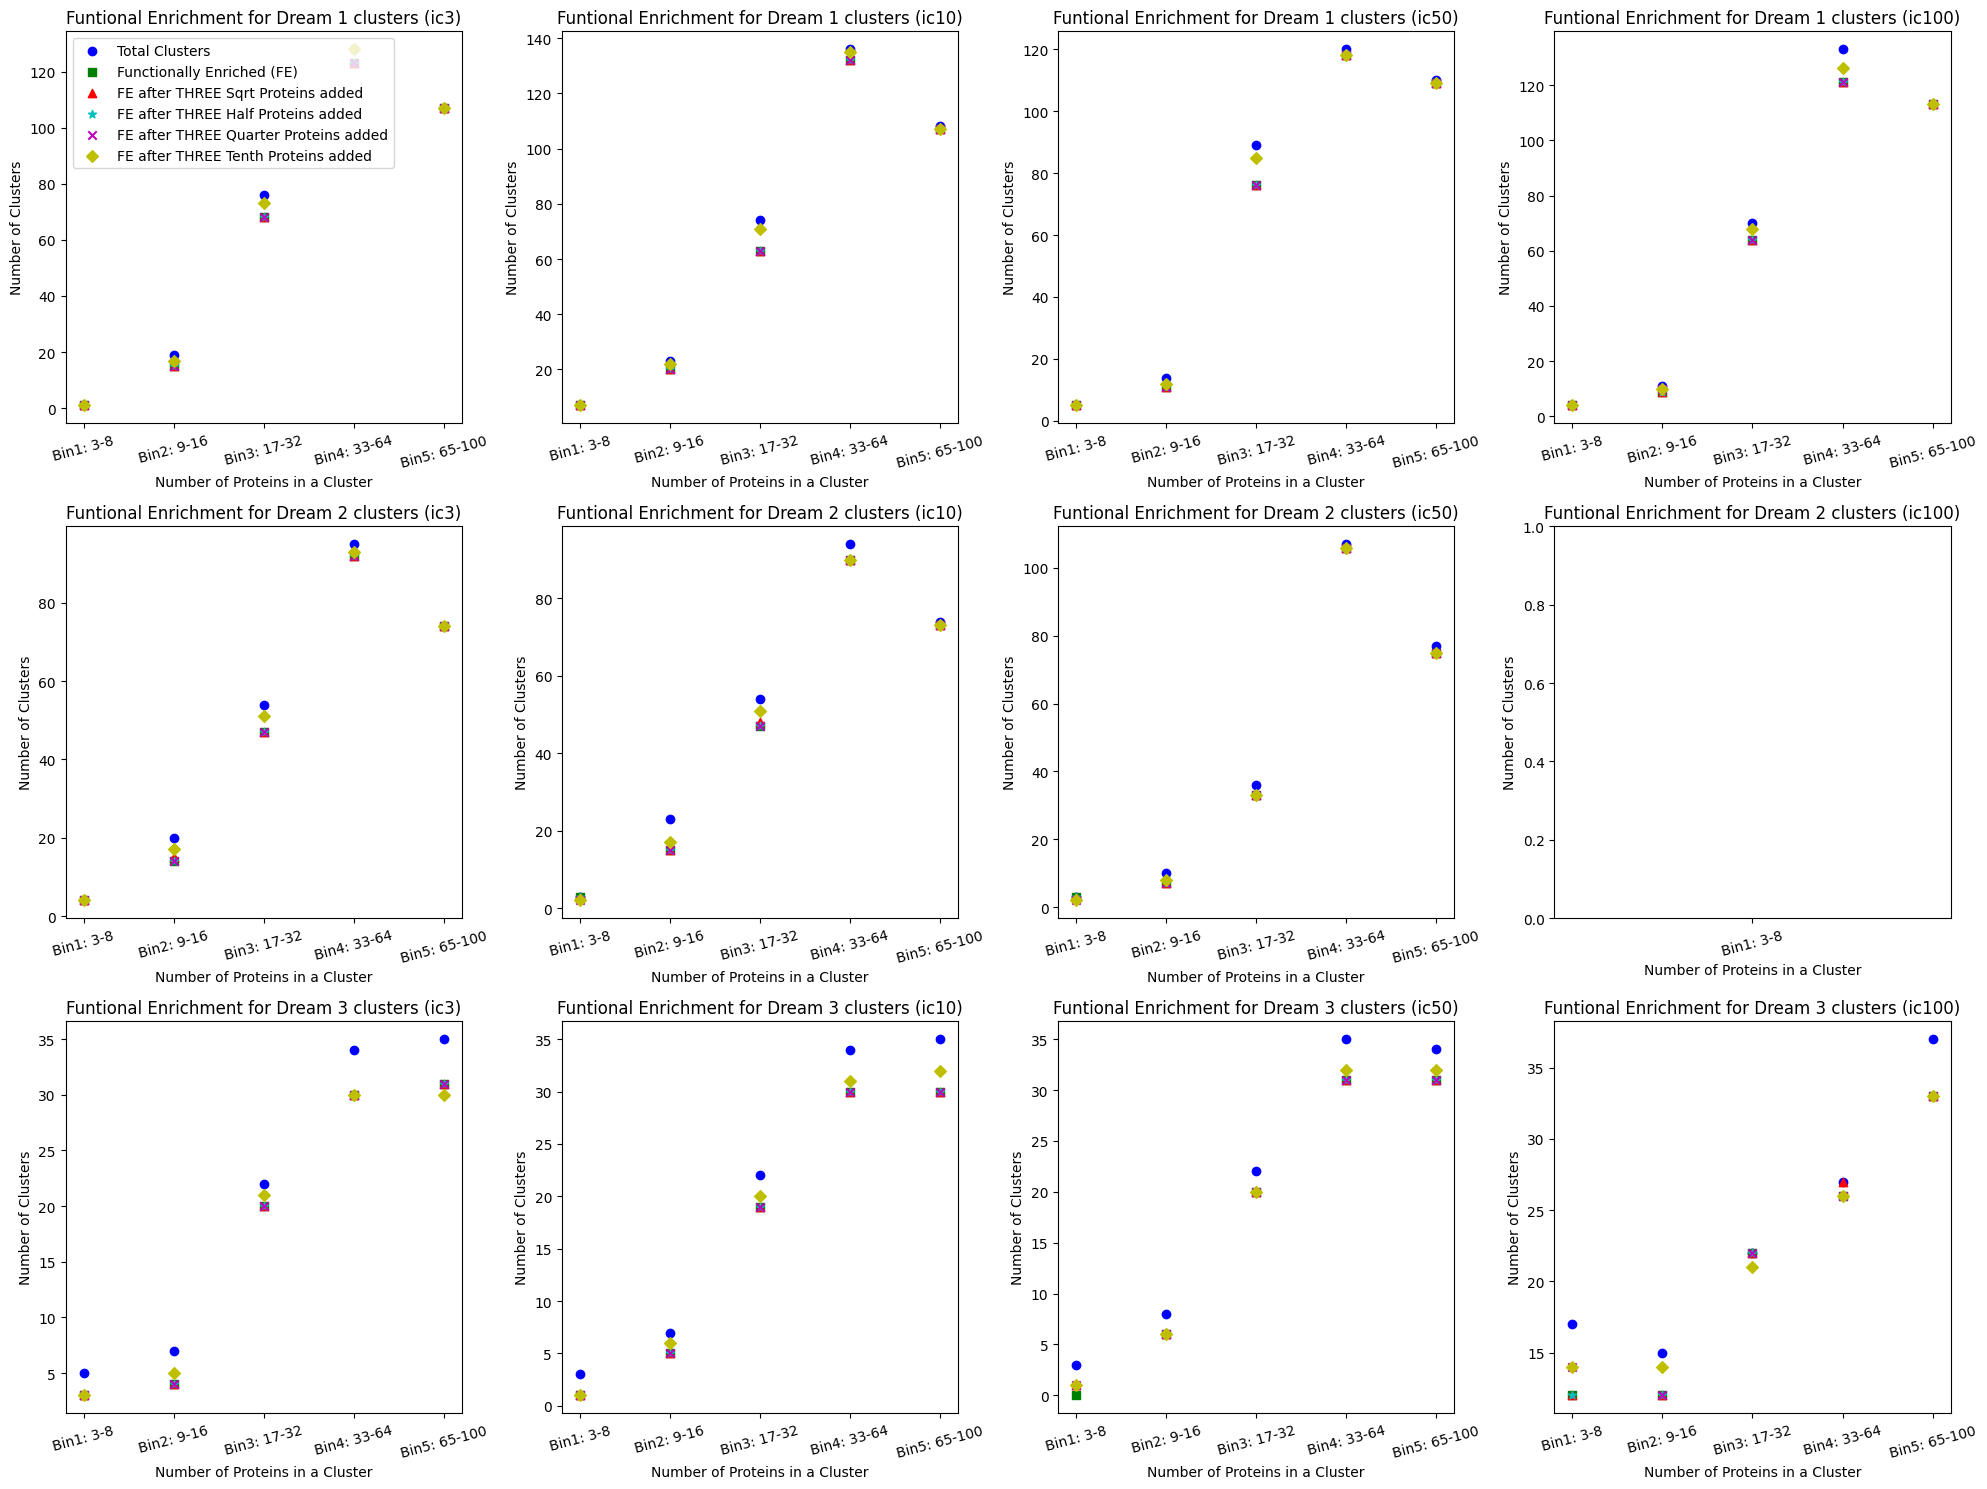

In [106]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))

for i, dream in enumerate(dreams):
    for j, scp in enumerate(scps):
        try:
            data_string = dream + "_" + scp    
            filtered_df = data[data['label'].str.startswith(data_string + "/bin")]
            three_p_filtered_df = three_p_data[three_p_data['label'].str.startswith(data_string + "/three_prots_bin")]

            # Extract the relevant columns
            num_clusters = filtered_df['num_clusters']
            original_fe_clusters = filtered_df['original']

            sqrt_fe_clusters = three_p_filtered_df['3_sqrt']
            half_fe_clusters = three_p_filtered_df['3_half']
            quarter_fe_clusters = three_p_filtered_df['q3_uarter']
            tenth_fe_clusters = three_p_filtered_df['3_tenth']

            # Plot the histogram in the corresponding subplot
            labels = ["Bin1: 3-8", "Bin2: 9-16", "Bin3: 17-32", "Bin4: 33-64", "Bin5: 65-100"]
            axes[i, j].set_xlabel('Number of Proteins in a Cluster')
            axes[i, j].set_ylabel(f'Number of Clusters')
            axes[i, j].set_title(f'Funtional Enrichment for Dream {dream[1:]} clusters ({scp})')
            axes[i, j].tick_params(axis='x', rotation=15)


            axes[i, j].scatter(labels, num_clusters, label='Total Clusters', color='b', marker='o')
            axes[i, j].scatter(labels, original_fe_clusters, label='Functionally Enriched (FE)', color='g', marker='s')
            axes[i, j].scatter(labels, sqrt_fe_clusters, label='FE after THREE Sqrt Proteins added', color='r', marker='^')
            axes[i, j].scatter(labels, half_fe_clusters, label='FE after THREE Half Proteins added', color='c', marker='*')
            axes[i, j].scatter(labels, quarter_fe_clusters, label='FE after THREE Quarter Proteins added', color='m', marker='x')
            axes[i, j].scatter(labels, tenth_fe_clusters, label='FE after THREE Tenth Proteins added', color='y', marker='D')
        except:
            pass

axes[0, 0].legend()

# Adjust the layout and spacing between subplots
plt.tight_layout()
plt.show()
